In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/jayaprakashpondy/ecgimages')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bellamkondanikhilsai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jayaprakashpondy/ecgimages


100%|██████████| 286M/286M [00:00<00:00, 796MB/s]


In [3]:
#get the dataset
testpath = '/content/ecgimages/test'
trainpath = '/content/ecgimages/train/'

In [4]:
code = {'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0, 'ECG Images of Patient that have History of MI (172x12=2064)': 1, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2, 'Normal Person ECG Images (284x12=3408)': 3}
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x    #return the name of categories

In [5]:
for folder in  os.listdir(testpath) : #go on seg_test path
    filess = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))#get all files jpg
    print(f'For training data , found {len(filess)} in folder {folder}')#print length for each class

For training data , found 0 in folder Normal Person ECG Images (284x12=3408)
For training data , found 0 in folder ECG Images of Patient that have History of MI (172x12=2064)
For training data , found 0 in folder ECG Images of Patient that have abnormal heartbeat (233x12=2796)
For training data , found 0 in folder ECG Images of Myocardial Infarction Patients (240x12=2880)


In [6]:
for folder in  os.listdir(trainpath ) : #go on seg_test path
    filess = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))#get all files jpg
    print(f'For training data , found {len(filess)} in folder {folder}')#print length for each class

For training data , found 284 in folder Normal Person ECG Images (284x12=3408)
For training data , found 172 in folder ECG Images of Patient that have History of MI (172x12=2064)
For training data , found 233 in folder ECG Images of Patient that have abnormal heartbeat (233x12=2796)
For training data , found 239 in folder ECG Images of Myocardial Infarction Patients (240x12=2880)


In [7]:
size = []
for folder in  os.listdir(trainpath ) :
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))#go on seg_train path
    for file in files:
        image = plt.imread(file)#read the image
        size.append(image.shape)#get the size of all image in size
pd.Series(size).value_counts()#count number of image have same shape

,count
"(1572, 2213, 3)",928


In [8]:
size = []
for folder in  os.listdir(testpath ) :
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))#go on seg_train path
    for file in files:
        image = plt.imread(file)#read the image
        size.append(image.shape)#get the size of all image in size
pd.Series(size).value_counts()#count number of image have same shape

,count


In [9]:
s = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : #go on seg_train path
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))#get all files jpg
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images to 100*100
        X_train.append(list(image_array))#list all images after resize in x_train
        y_train.append(code[folder])#get the names of images from code function

In [10]:
print(f'we have {len(X_train)} items in X_train')
print(f'we have {len(y_train)} items in Y_train')

we have 928 items in X_train
we have 928 items in Y_train


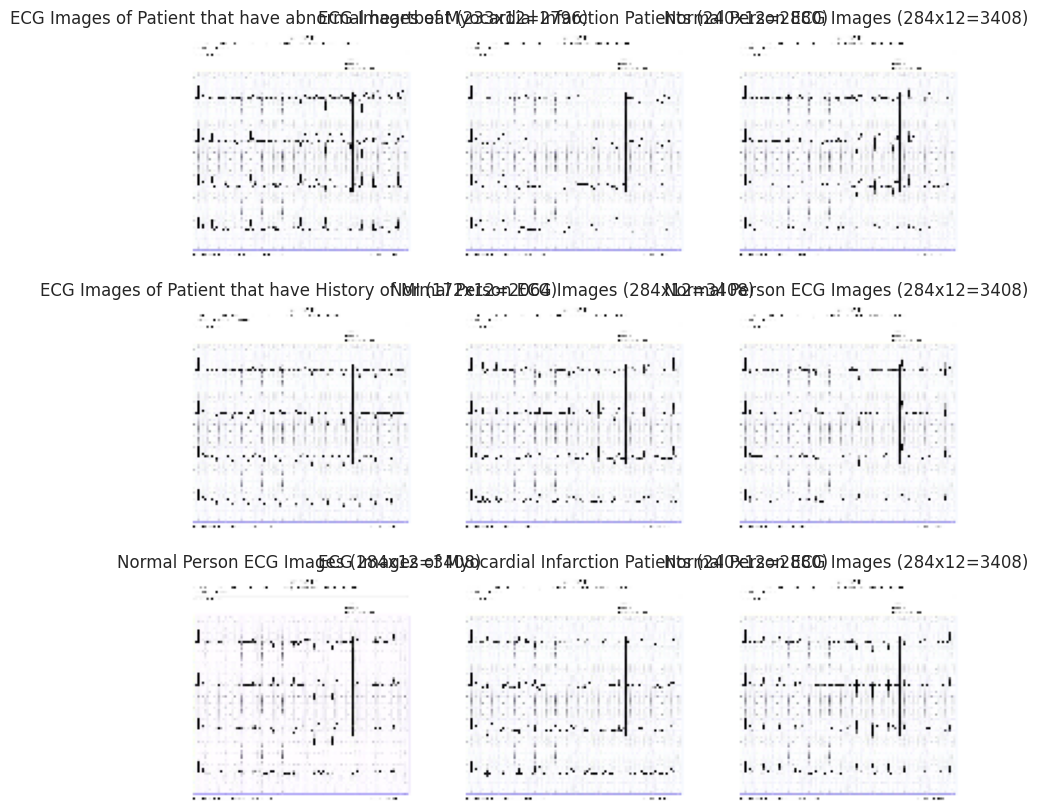

In [11]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),9))) : #print random images
    plt.subplot(3,3,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : #go on seg_train path
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))#get all files jpg
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))#resize all images to 100*100
        X_test.append(list(image_array))#list all images after resize in x_train
        y_test.append(code[folder])#get the names of images from code function

In [13]:
# print(f'we have {len(X_test)} items in X_test')
# plt.figure(figsize=(10,10))
# for n , i in enumerate(list(np.random.randint(0,len(X_test),9))) :
#     plt.subplot(3,3,n+1)
#     plt.imshow(X_test[i])
#     plt.axis('off')
#     plt.title(getcode(y_test[i]))

In [14]:
X_train = np.array(X_train)#get train ,test and pred arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (928, 100, 100, 3)
X_test shape  is (0,)
y_train shape  is (928,)
y_test shape  is (0,)


In [15]:
KerasModel = tf.keras.models.Sequential([#bulid nn
        tf.keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        #1 convolutional layer 200filter each filter 3*3 relu  input 100*100*3 rgb
        tf.keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
       #2 convolutional layer 150filter each filter 3*3 relu
        tf.keras.layers.MaxPool2D(4,4),
        #3 maxpool layer 4*4
        tf.keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        #4 convolutional layer 120filter each filter 3*3 relu
        tf.keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        #5 convolutional layer 80filter each filter 3*3 relu
        tf.keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        #6 convolutional layer 50filter each filter 3*3 relu
        tf.keras.layers.MaxPool2D(4,4),#7 maxpool layer 4*4
        tf.keras.layers.Flatten(),  #make the matrix flate
        tf.keras.layers.Dense(120,activation='relu') , #hidden layer (120cell)
        tf.keras.layers.Dense(100,activation='relu') , #hidden layer (100cell)
        tf.keras.layers.Dense(50,activation='relu') ,  #hidden layer (50cell)
        tf.keras.layers.Dropout(rate=0.5) ,
        #drop some nuron 50% reduces the number of connections to increase speed and reduces the overfit
        tf.keras.layers.Dense(6,activation='softmax') ,  #output layer 6
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

fname = 'model.h5'
checkpoint = ModelCheckpoint(filepath=fname,
                             monitor='loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min'
                             )

callbacks = [checkpoint]

In [17]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'],run_eagerly=True)
#gradient descent to get the global optimization ,cost function(multi classification),begin accuracy

In [18]:
print('Model Details are : ')
print(KerasModel.summary())#calc num of paramter

Model Details are : 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 200)    │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 150)    │       270,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 120)    │       162,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 80)     │        86,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 50)     │        36,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        96,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,976 (2.57 MB)

 Trainable params: 673,976 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1, callbacks=callbacks)#traning
#batch size =num of images for each one

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.1917 - loss: 17.0445
Epoch 1: loss improved from inf to 9.27682, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.1929 - loss: 16.5590
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.2952 - loss: 1.5955
Epoch 2: loss improved from 9.27682 to 1.56644, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.2952 - loss: 1.5937
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.2991 - loss: 1.5408
Epoch 3: loss improved from 1.56644 to 1.54320, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.2983 - loss: 1.5410
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.2913 - loss: 1.5436
Epoch 4: loss improved from 1.54320 to 1.53447, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.2908 - loss: 1.5430
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.2672 - loss: 1.5271
Epoch 5: loss did not improve from 1.53447
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.2664 - loss: 1.5276
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.2343 - loss: 1.5296
Epoch 6: loss improved from 1.53447 to 1.52158, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.2353 - loss: 1.5291
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.2650 - loss: 1.5038
Epoch 7: loss improved from 1.52158 to 1.48631, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.2667 - loss: 1.5027
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3075 - loss: 1.4898
Epoch 8: loss did not improve from 1.48631
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.3071 - loss: 1.4901
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.2687 - loss: 1.4916
Epoch 9: loss improved from 1.48631 to 1.48431, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.2685 - loss: 1.4912
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.2806 - loss: 1.4900
Epoch 10: loss improved from 1.48431 to 1.46986, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.2808 - loss: 1.4888
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.3031 - loss: 1.4603
Epoch 11: loss improved from 1.46986 to 1.44228, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.3037 - loss: 1.4591
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.3313 - loss: 1.3958
Epoch 12: loss improved from 1.44228 to 1.37682, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.3333 - loss: 1.3946
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.3723 - loss: 1.3419
Epoch 13: loss improved from 1.37682 to 1.32898, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.3736 - loss: 1.3411
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.4540 - loss: 1.2396
Epoch 14: loss improved from 1.32898 to 1.23329, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 277ms/step - accuracy: 0.4541 - loss: 1.2392
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.4811 - loss: 1.1778
Epoch 15: loss improved from 1.23329 to 1.14806, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.4815 - loss: 1.1759
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5402 - loss: 1.0677
Epoch 16: loss improved from 1.14806 to 1.02916, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.5416 - loss: 1.0653
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6282 - loss: 0.9327
Epoch 17: loss improved from 1.02916 to 0.90627, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.6286 - loss: 0.9310
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6734 - loss: 0.8461
Epoch 18: loss improved from 0.90627 to 0.79162, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.6751 - loss: 0.8427
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6829 - loss: 0.8057
Epoch 19: loss did not improve from 0.79162
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.6822 - loss: 0.8081
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.7205 - loss: 0.7039
Epoch 20: loss improved from 0.79162 to 0.67443, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.7219 - loss: 0.7021
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.6831 - loss: 0.7522
Epoch 21: loss improved from 0.67443 to 0.64958, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.6864 - loss: 0.7457
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.8028 - loss: 0.4987
Epoch 22: loss improved from 0.64958 to 0.53288, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.8021 - loss: 0.5008
Epoch 23/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8250 - loss: 0.4553
Epoch 23: loss improved from 0.53288 to 0.46623, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.8243 - loss: 0.4560
Epoch 24/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8368 - loss: 0.4191
Epoch 24: loss improved from 0.46623 to 0.41620, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.8369 - loss: 0.4189
Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8965 - loss: 0.2974
Epoch 25: loss improved from 0.41620 to 0.29988, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.8964 - loss: 0.2976
Epoch 26/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.8540 - loss: 0.3530
Epoch 26: loss did not improve from 0.29988
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.8547 - loss: 0.3519
Epoch 27/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8498 - loss: 0.3553
Epoch 27: loss did not improve from 0.29988
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.8514 - loss: 0.3531
Epoch 28/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9182 - loss: 0.2197
Epoch 28: loss improved from 0.29988 to 0.19815, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9190 - loss: 0.2183
Epoch 29/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9406 - loss: 0.1636
Epoch 29: loss improved from 0.19815 to 0.17640, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.9404 - loss: 0.1644
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9466 - loss: 0.1612
Epoch 30: loss did not improve from 0.17640
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.9459 - loss: 0.1623
Epoch 31/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9241 - loss: 0.2065
Epoch 31: loss did not improve from 0.17640
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.9246 - loss: 0.2057
Epoch 32/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.9214 - loss: 0.2191
Epoch 32: loss improved from 0.17640 to 0.17318, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - accuracy: 0.9228 - loss: 0.2162
Epoch 33/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9519 - loss: 0.1402
Epoch 33: loss improved from 0.17318 to 0.12536, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.9520 - loss: 0.1393
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9518 - loss: 0.1056
Epoch 34: loss improved from 0.12536 to 0.11200, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.9520 - loss: 0.1060
Epoch 35/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9652 - loss: 0.1169
Epoch 35: loss did not improve from 0.11200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.9649 - loss: 0.1171
Epoch 36/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9794 - loss: 0.0814
Epoch 36: loss improved from 0.11200 to 0.07792, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.9792 - loss: 0.0812
Epoch 37/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9846 - loss: 0.0540
Epoch 37: loss improved from 0.07792 to 0.05974, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.9843 - loss: 0.0543
Epoch 38/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9798 - loss: 0.0607
Epoch 38: loss did not improve from 0.05974
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.9795 - loss: 0.0610
Epoch 39/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9813 - loss: 0.0555
Epoch 39: loss improved from 0.05974 to 0.05765, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - accuracy: 0.9812 - loss: 0.0556
Epoch 40/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9903 - loss: 0.0403
Epoch 40: loss improved from 0.05765 to 0.03935, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.9902 - loss: 0.0403
Epoch 41/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9911 - loss: 0.0425
Epoch 41: loss improved from 0.03935 to 0.03663, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.9912 - loss: 0.0421
Epoch 42/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9898 - loss: 0.0287
Epoch 42: loss improved from 0.03663 to 0.02550, saving model to model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.9898 - loss: 0.0285
Epoch 43/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9882 - loss: 0.0366
Epoch 43: loss did not improve from 0.02550
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - accuracy: 0.9884 - loss: 0.0362
Epoch 44/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.9848 - loss: 0.0263
Epoch 44: loss did not improve from 0.02550
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9849 - loss: 0.0263
Epoch 45/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.9900 - loss: 0.0286
Epoch 45: loss did not improve from 0.02550
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.9900 - loss: 0.0286
Epoch 46/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9727 - loss: 0.0824
Epoch 46: loss did not improve from 0.02550
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.9717 - loss: 0.0857
Epoch 47/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9415 - loss: 0.1712
Epoch 47: loss

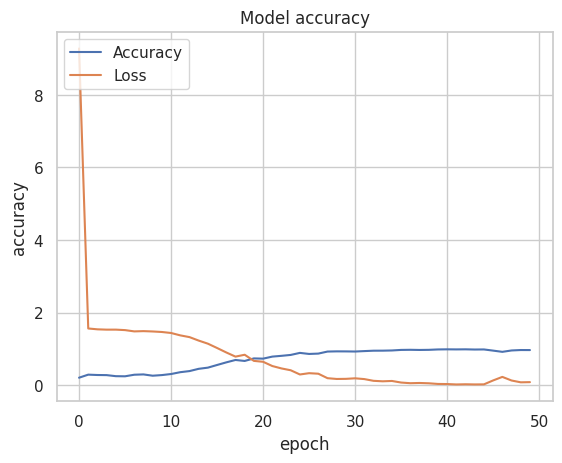

In [20]:
# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.models import load_model
mdl = load_model('model.h5')

In [22]:
# prediction = mdl.predict(X_test)
# scores = mdl.evaluate(X_test, y_test, verbose=1)
# print("Accuracy Score on Test set: {:.2f}%".format(scores[1]*100))

In [23]:
X_test.shape

(0,)

In [24]:
labels = {0:'HEART DISEASE', 1:'History of HEART DISEASE', 2:'Abnormal Heart Pulse', 3:'Normal Heart Pulse'}

#Specify test_image path
im_path = '/content/ecgimages/test/Normal Person ECG Images (284x12=3408)/test (1).jpg'
test_img = cv2.imread(im_path)
test_img = cv2.resize(test_img, (100, 100))
tensor = tf.expand_dims(test_img, axis=0)
pred = labels[np.argmax(mdl.predict(tensor))]
print("PATIENT has",pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
PATIENT has Normal Heart Pulse


In [25]:
!cp 'model.h5' -d '/content'

cp: 'model.h5' and '/content/model.h5' are the same file
